In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [9]:
df=pd.read_csv('data_step2.csv', low_memory=False)

### Remove price less than 10000

In [10]:
#Remove price less than 10000, wrong: (More better solution make a number according othre samples)
df = df[df['price'] >= 10000]

### Remove the category with less than 40 data

In [11]:
category_counts = df['دسته بندی'].value_counts()
categories_to_keep = category_counts[category_counts >= 40].index
df_filtered = df[df['دسته بندی'].isin(categories_to_keep)]
df = df[df['دسته بندی'].isin(categories_to_keep)]

In [12]:
df.dropna(axis=0, how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

In [13]:
df=df.reset_index(drop=True)

### Box plot on price to find outlier

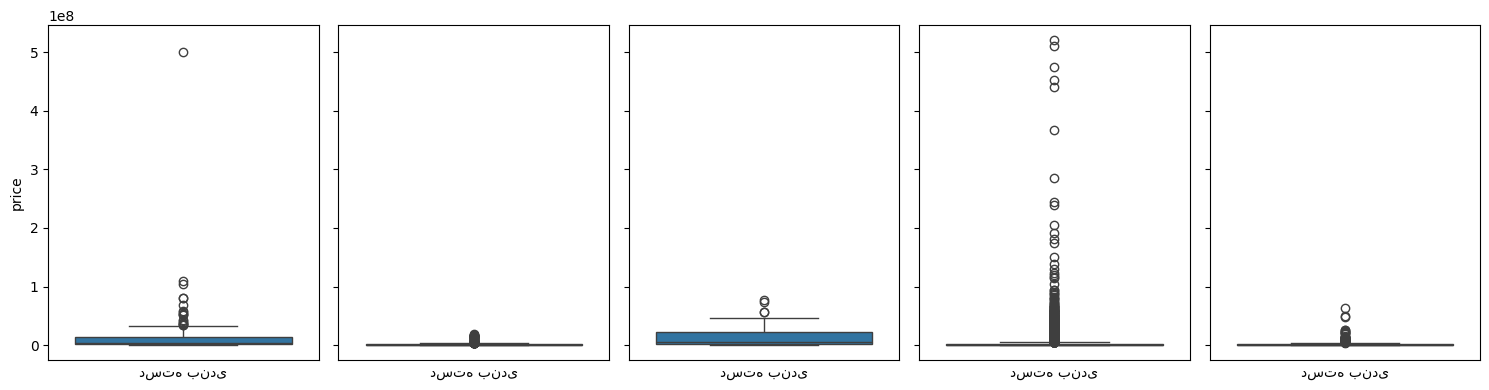

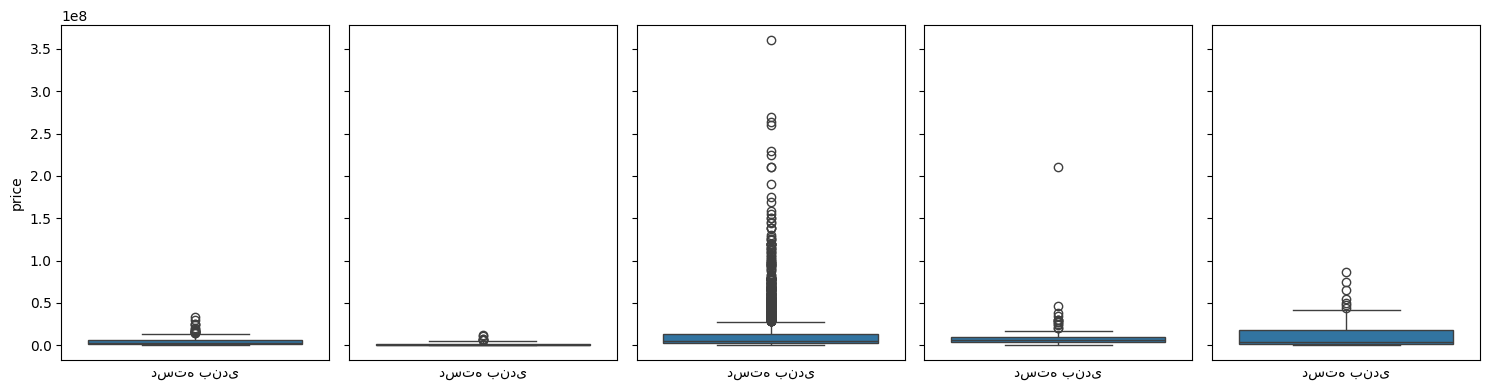

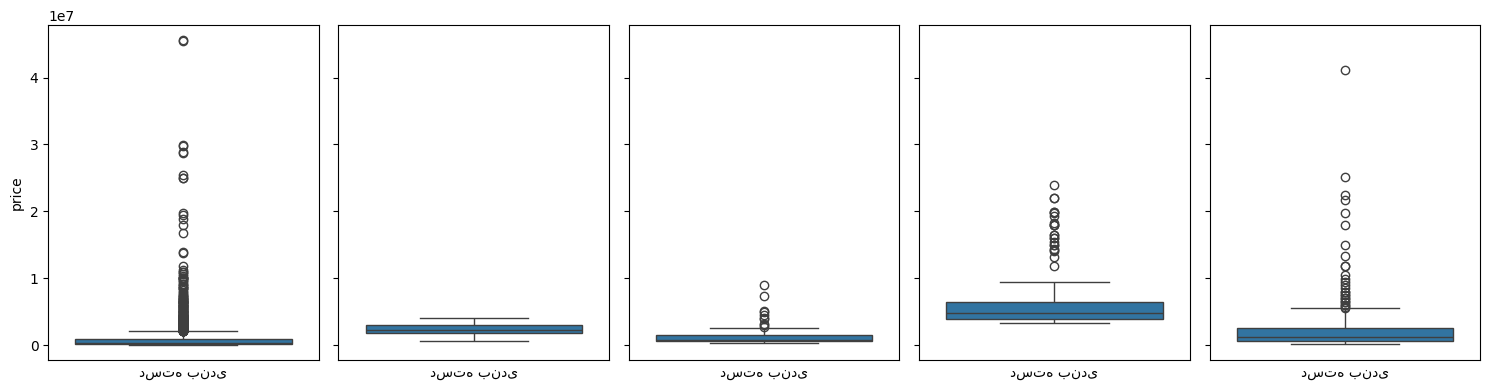

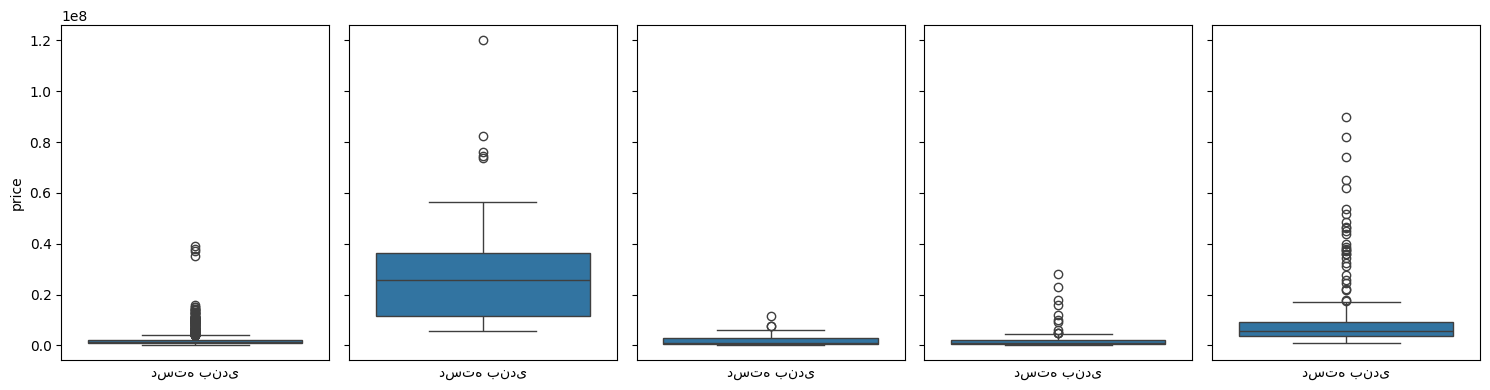

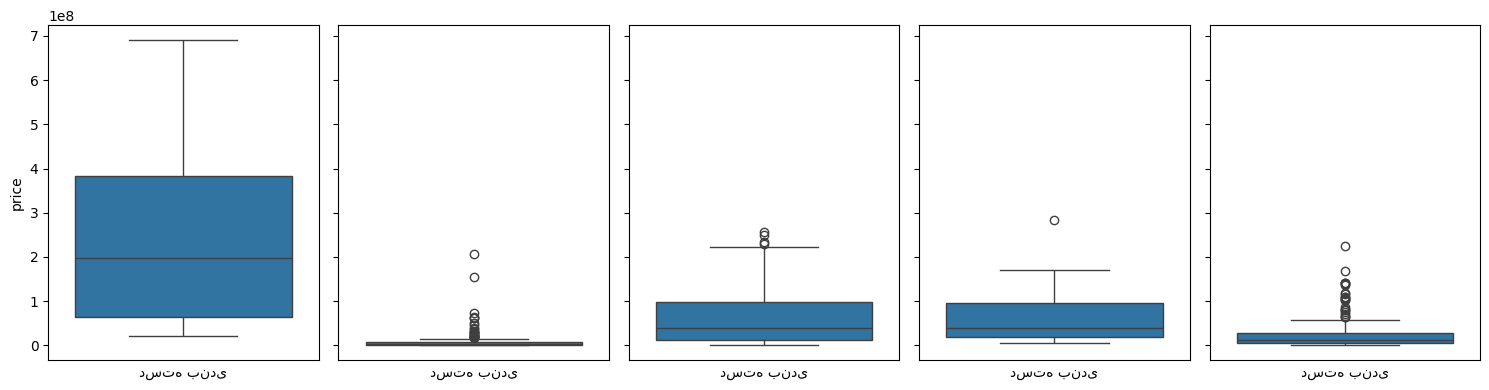

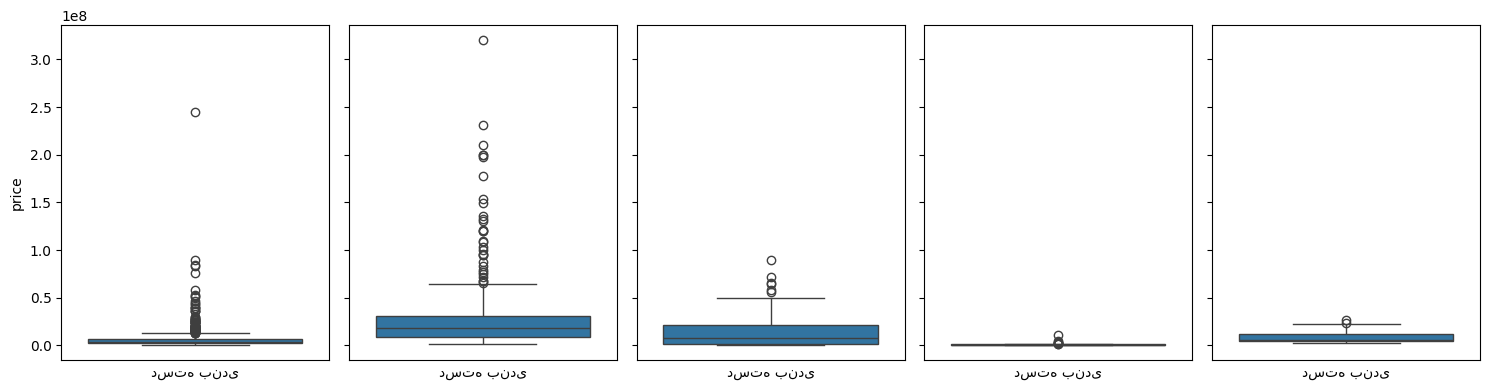

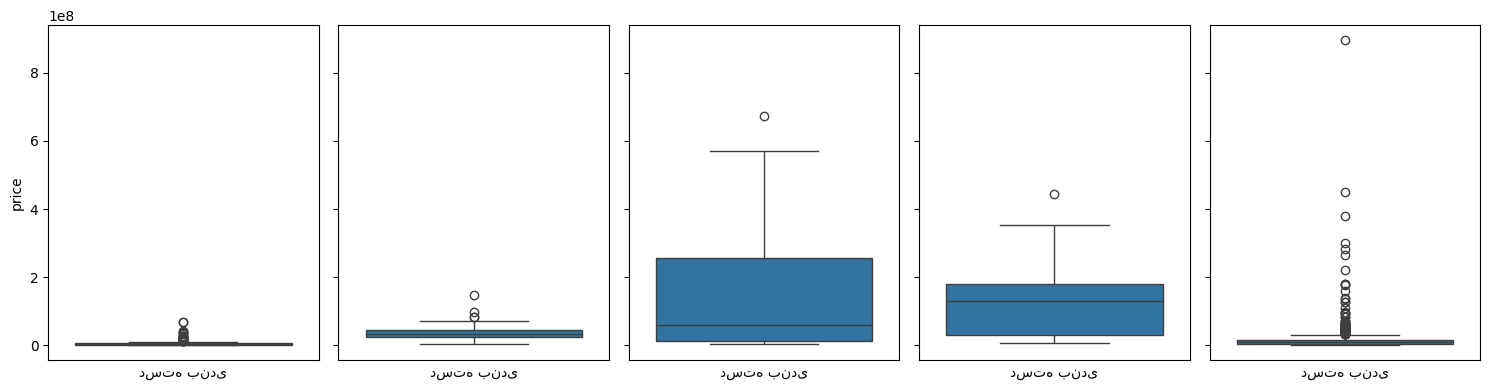

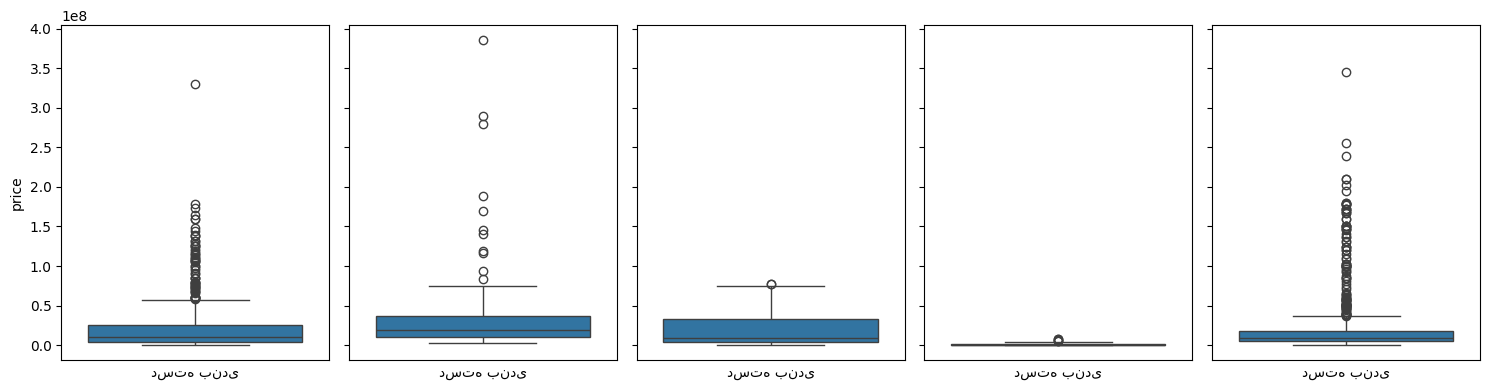

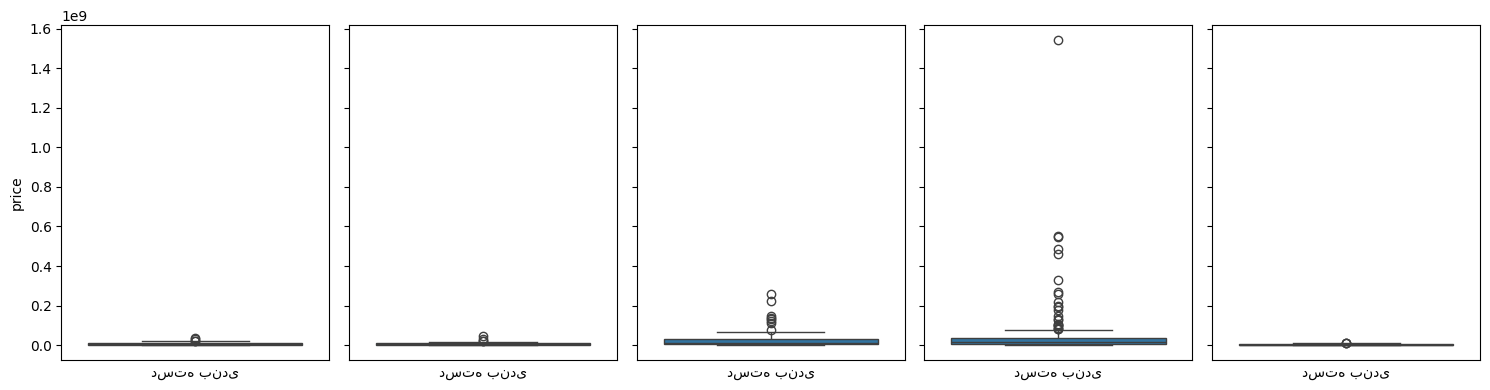

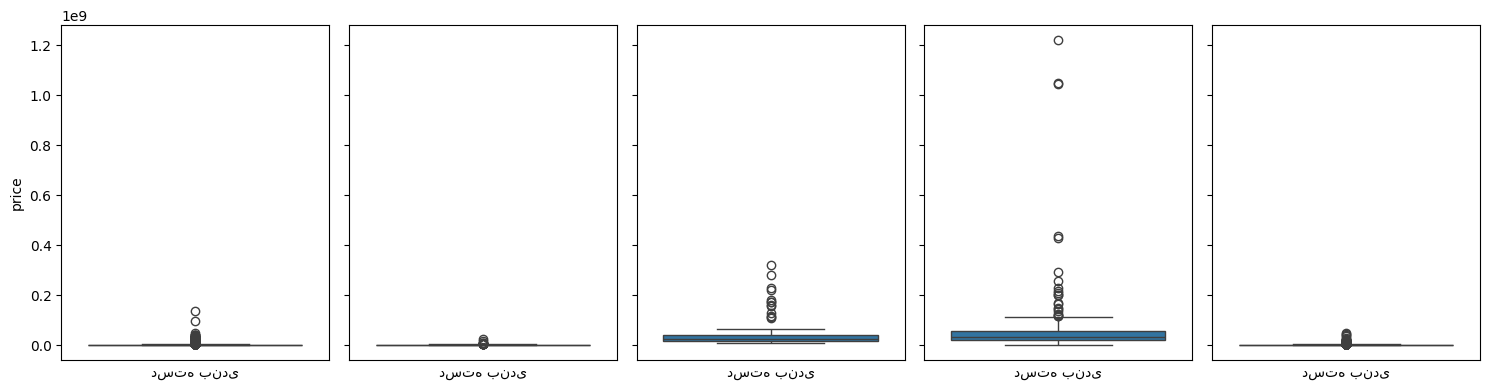

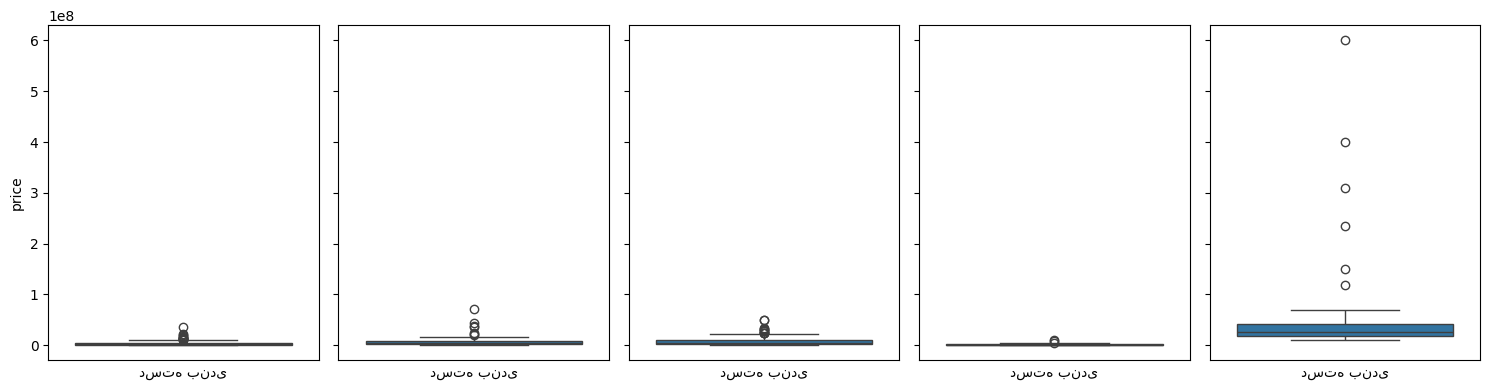

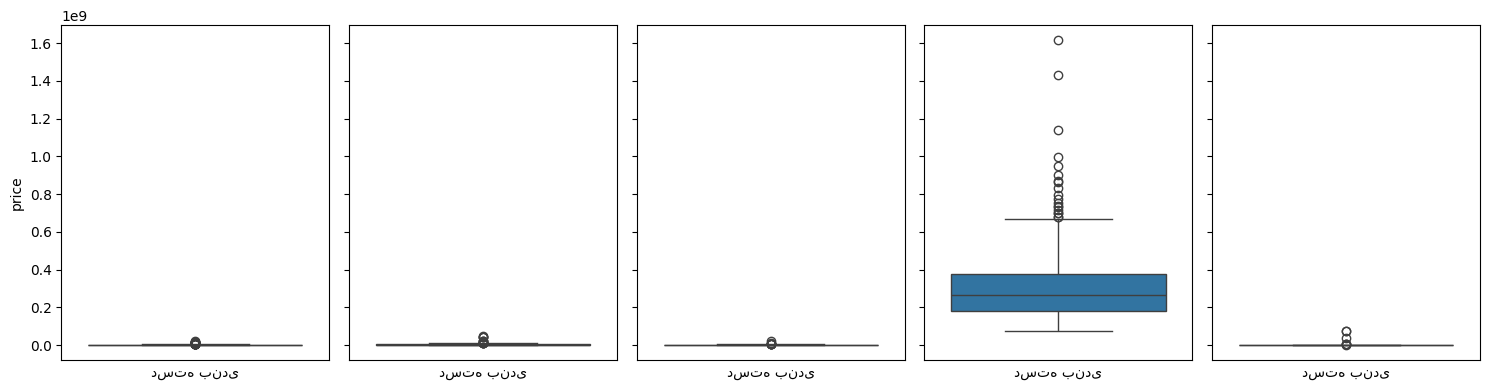

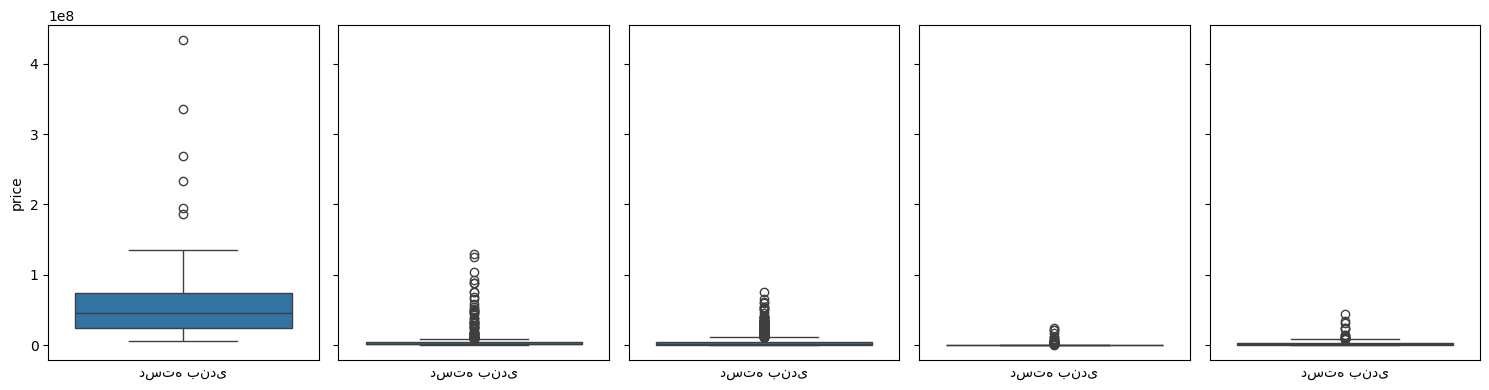

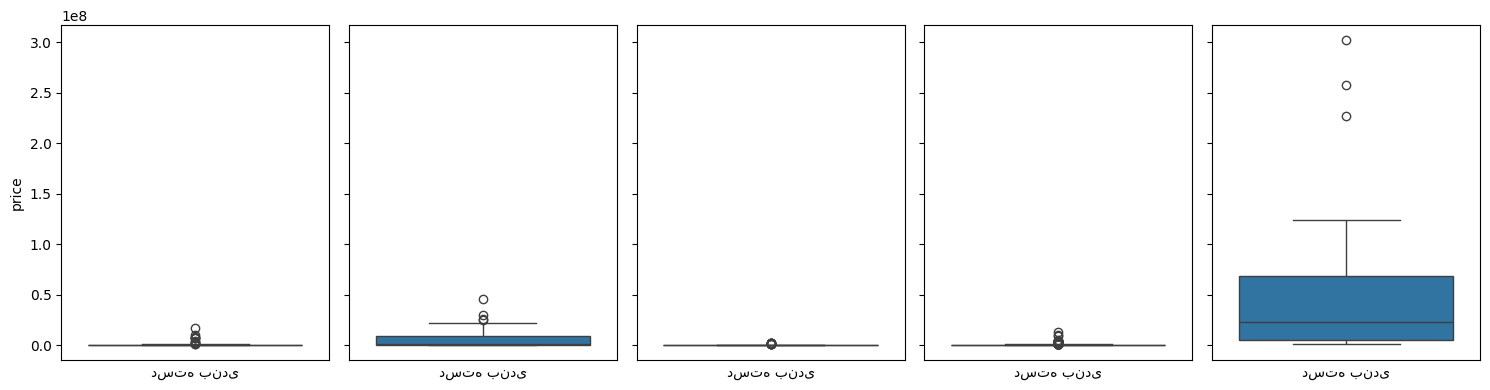

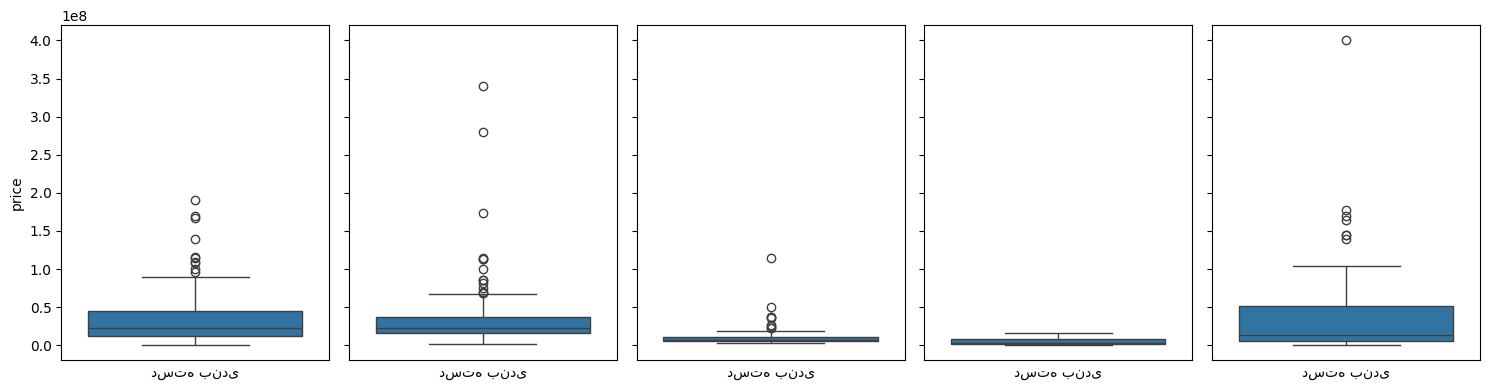

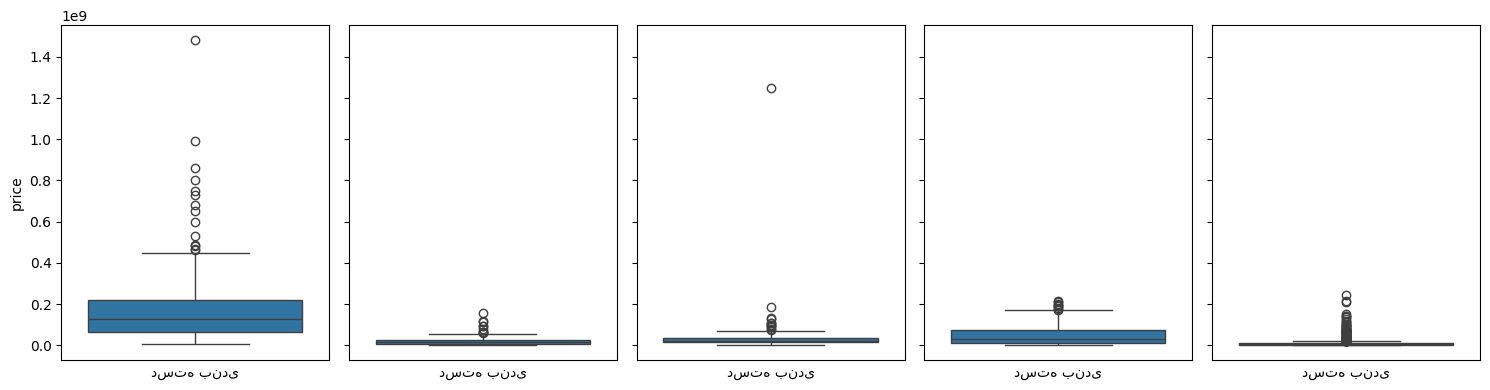

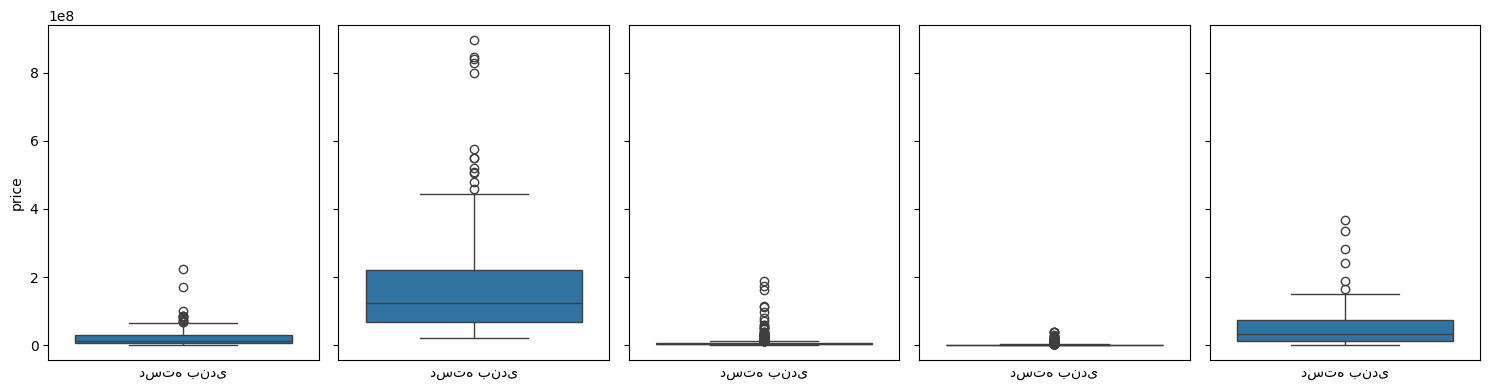

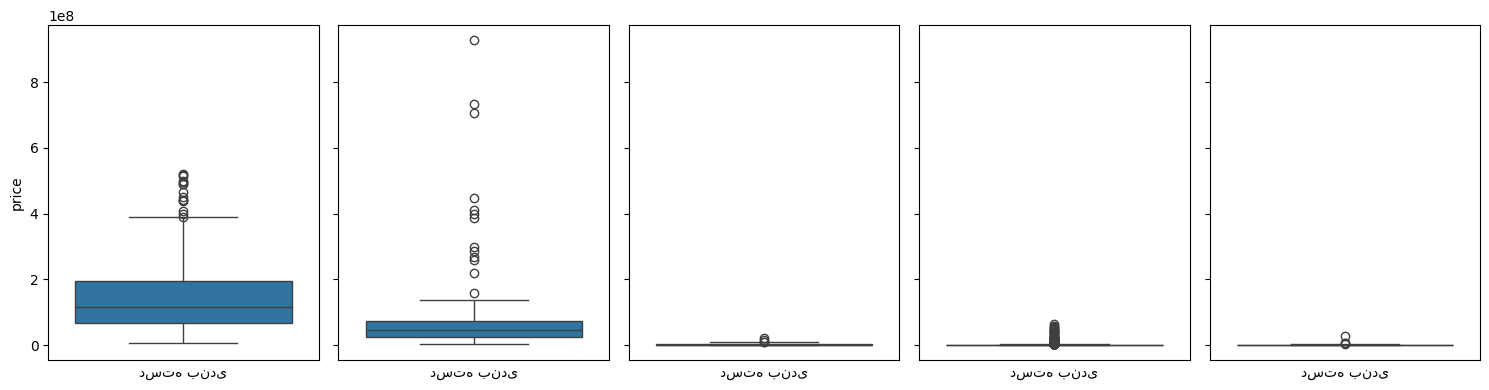

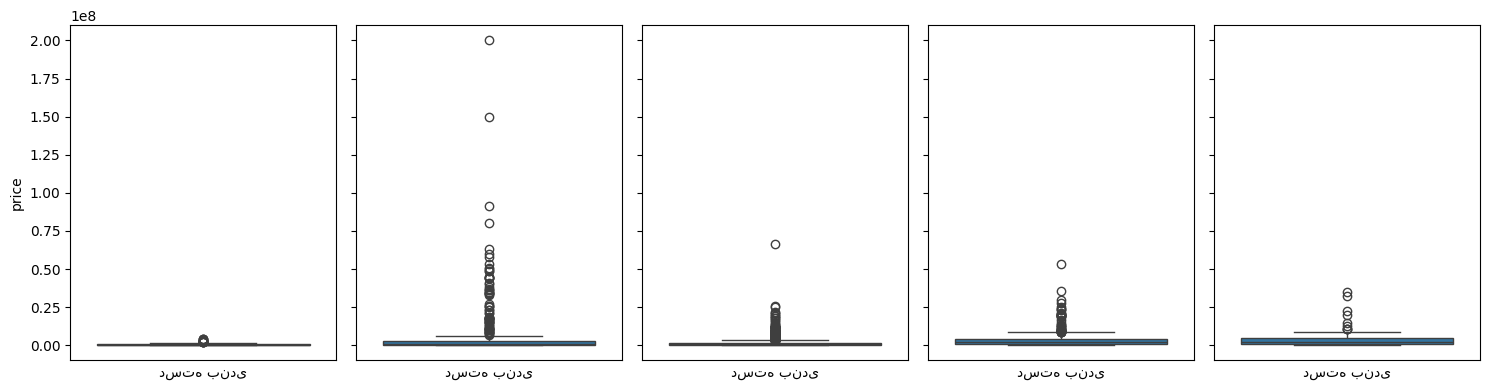

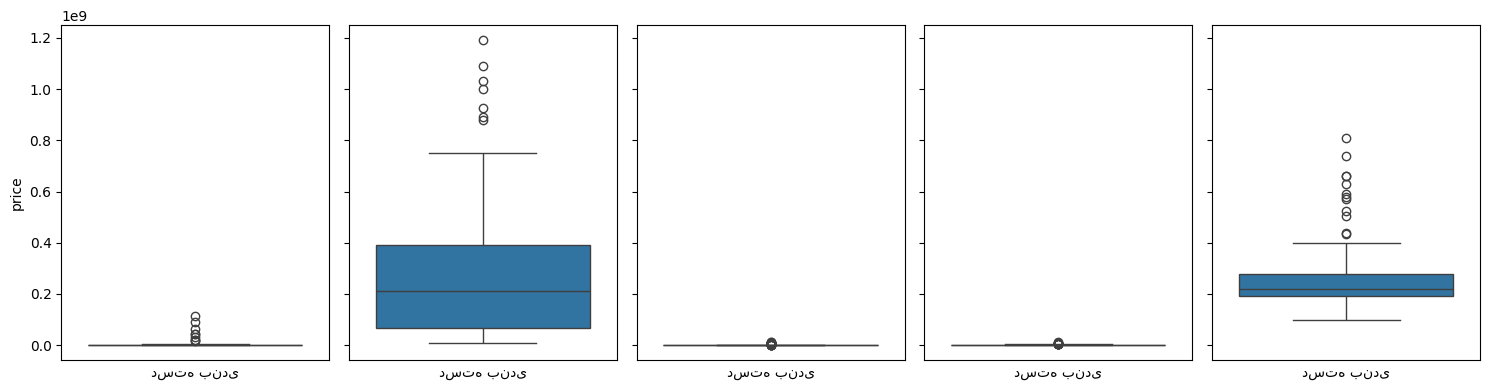

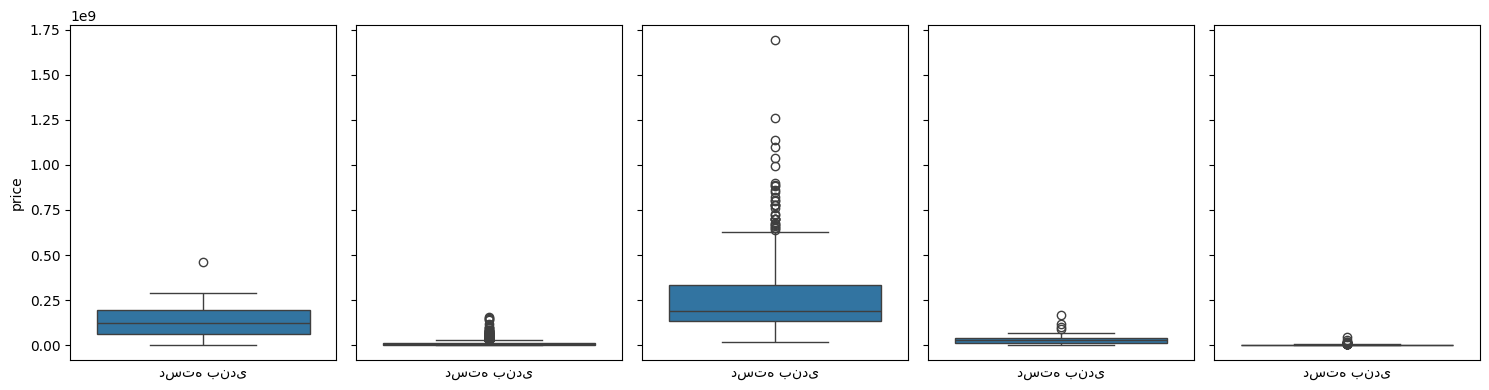

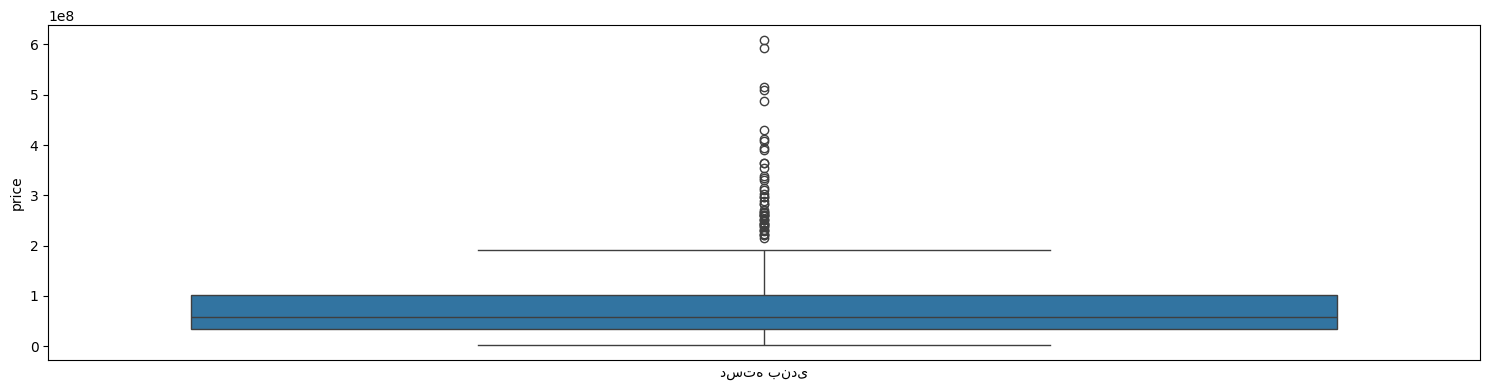

In [21]:
### Box plot on price to find outlier
result = df.groupby('دسته بندی')['price'].agg(list).reset_index()

# Flatten the list of prices
flat_prices = list(itertools.chain.from_iterable(result['price']))

# Create a new DataFrame with flattened prices and corresponding categories
flat_df = pd.DataFrame({'دسته بندی': list(itertools.chain.from_iterable([[cat] * len(prices) for cat, prices in zip(result['دسته بندی'], result['price'])])),
                        'price': flat_prices})

num_categories = len(result)
categories_per_figure = 5

for i in range(0, num_categories, categories_per_figure):
    fig, axes = plt.subplots(nrows=1, ncols=min(categories_per_figure, num_categories - i), figsize=(15, 4), sharey=True)
    axes = np.ravel(axes)  # Flatten the axes array

    for j in range(min(categories_per_figure, num_categories - i)):
        cat_index = i + j
        cat = result.iloc[cat_index]['دسته بندی']
        group = flat_df[flat_df['دسته بندی'] == cat]
        
        sns.boxplot(x='دسته بندی', y='price', data=group, ax=axes[j])
        # axes[j].set_title(f'Category: {cat}')
        axes[j].set_xticks([])  # Hide x-axis labels for better readability

    plt.tight_layout()
    plt.show()


### Find and remove outlier

In [16]:
# Function to identify outliers within each category using IQR
def identify_outliers(prices):
    Q1 = prices.quantile(0.25)
    Q3 = prices.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Return a boolean mask for outliers
    outliers_mask = (prices < lower_bound) | (prices > upper_bound)
    
    return outliers_mask

# Group by 'دسته بندی' and apply the identify_outliers function
outliers_info = df.groupby('دسته بندی')['price'].apply(identify_outliers)


In [17]:
#remove outlier
# Extract indices of rows where 'price' is an outlier
outlier_indices = np.where(outliers_info)[0]

df = df.drop(outlier_indices)

In [18]:
df=df.reset_index(drop=True)

### Save to csv file

In [19]:
df.to_csv('data_step3.csv', index=False)